Hierarchical clustering combine similar data points into groups by forming hierachy of cluster. 
There are two approaches

1) Agglomerative  or bottom up approach

2) Divisive or top-down approach

In this tutorial we will perform Agglomerative clustering using sklearn library. 
The time complexity of Hierarchical clustering is O(n^3)

Except for the special case of single-linkage, none of the algorithms (except exhaustive search in O(2^n)) can be guaranteed to find the optimum solution.

#### Loading required packages to complete the lab

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

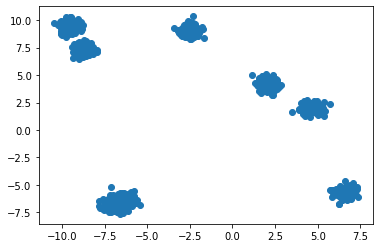

In [0]:
# Creating dataset for clustering problem
X, y = make_blobs(n_samples=1000, centers=8, cluster_std=.35, random_state=42)

# plotting dataset
plt.scatter(X[:,0], X[:,1])
plt.show()

This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample. A dendogram keeps the sequences of merges or splits. 

 If you look out the dendogram below, then the number of vertical line that the horizontal line cuts in the dendogram at any points gives the number of clusters at that point.

The vertical lines represent the distance between clusters.More the distance of the vertical lines in the dendrogram, more the distance between those clusters and vice-versa.
So we need 


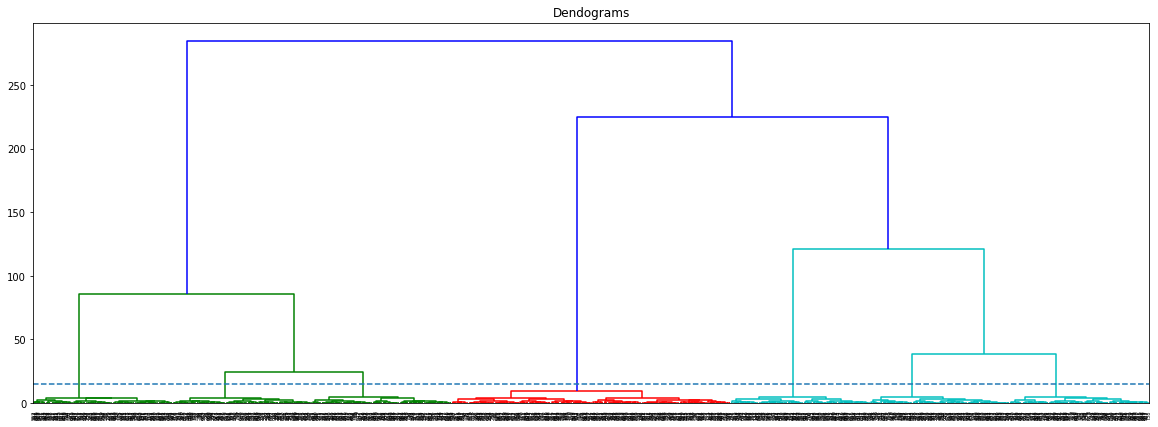

In [0]:
plt.figure(figsize=(20, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendograms")
plt.axhline(linestyle='--', y=15) 
plt.show()



Below we are using "ward" method which utilizes the Ward variance minimization algorithm to calculate the distance between newly formed cluster. There are many method such as  "single", "complete", "average" etc that can be used to calcualte the distance between newly formed clusters 

Affinity takes the metric used to compute the linkage. It can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed". Here we are using "euclidean" distance.




In [0]:
# creating instance of our model
agglo_clus = AgglomerativeClustering(n_clusters=7, affinity="euclidean", 
                                     linkage="ward")

In [0]:
# fitting the initialized model
agglo_clus.fit(X)

# getting the labels of the model
labels = agglo_clus.labels_

# inspecting labels of top 10 data points
labels[:10]

array([0, 0, 0, 1, 6, 5, 5, 6, 1, 2])

In [0]:
# fitting the initialized model
agglo_clus.fit(X)

# getting the labels of the model
labels = agglo_clus.labels_

# inspecting labels of top 10 data points
labels[:10]

array([0, 0, 0, 1, 6, 5, 5, 6, 1, 2])

In [0]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 7))
colors

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.70588235e-01, 4.94655843e-01, 9.66718404e-01, 1.00000000e+00],
       [1.66666667e-01, 8.66025404e-01, 8.66025404e-01, 1.00000000e+00],
       [5.03921569e-01, 9.99981027e-01, 7.04925547e-01, 1.00000000e+00],
       [8.33333333e-01, 8.66025404e-01, 5.00000000e-01, 1.00000000e+00],
       [1.00000000e+00, 4.94655843e-01, 2.55842778e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

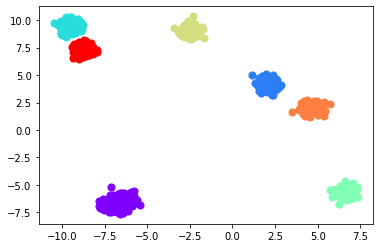

In [0]:
# coloring data points based on cluster
for i in range(7):
  plt.scatter(X[labels==i, 0], X[labels==i, 1], s=50, 
              color=colors[i], marker="o")